# Projecto Sprint 9

In [1]:
#Importamos las librerias necesarias 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.utils import shuffle
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Cargamos los datos
b_bank = pd.read_csv('/datasets/Churn.csv')

In [3]:
b_bank.info()
b_bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
b_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


-Presencia de valores ausentes en la columna 'Tenure'

# Preparación de datos

In [5]:
b_bank.columns = b_bank.columns.str.lower()
#Cambiamos a minusculas los titulos de las columnas

In [6]:
b_bank.isna().sum()
#Verficamos la presencia de valorres ausentes

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [7]:
b_bank.duplicated()
#Verificamos la presencia de duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
#Rellenamos los valores ausentes con la mediana(variable continua)
b_bank['tenure'] = b_bank['tenure'].fillna(b_bank['tenure'].median())

b_bank.sample(5)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
5815,5816,15788022,Sternberg,802,Germany,Female,41,4.0,90757.64,2,0,1,169183.66,0
8350,8351,15709531,Harding,556,France,Male,38,2.0,114756.14,1,1,0,193214.05,0
9731,9732,15627859,Nebeolisa,607,Germany,Male,29,7.0,102609.00,1,1,0,163257.44,0
3541,3542,15637169,Maclean,838,Spain,Female,67,4.0,103267.80,1,1,1,78310.04,0
7412,7413,15631693,Hill,697,France,Male,36,7.0,0.00,2,1,1,74760.32,0


In [9]:
# Eliminar columnas irrelevantes
b_bank = b_bank.drop(columns=['rownumber', 'customerid', 'surname'])

In [10]:
b_bank.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

-Las columnas geography y gender son variables categoricas.

# Transformar características categóricas 

In [11]:
# Aplicar One-Hot Encoding para la columna 'geography' y 'gender'
b_bank = pd.get_dummies(b_bank, columns=['geography', 'gender'], drop_first=True)


# División de datos

In [12]:
# División de las características y la variable objetivo
# La columna 'exited' es nuestra variable objetivo, que indica si un cliente abandonó (1) o no (0).
# El resto de las columnas serán nuestras características (features), ya que contienen información relevante para predecir el abandono.
target = b_bank['exited']  
features = b_bank.drop('exited', axis=1)


In [13]:
#División conjunto en entrenamiento y validación
#Divide los datos en conjuntos de entrenamiento (75%) y validación (25%).
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)



# Escalado de características

In [14]:
# Escalar características numéricas
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

# Transformar características numéricas en los conjuntos de entrenamiento y validación
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])



/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


# Analisis del desequilibrio de clases

In [15]:
# Visualizar el desequilibrio de clases
print("Distribución inicial de clases en el conjunto de entrenamiento:")
class_distribution = Counter(target_train)
print(class_distribution)

Distribución inicial de clases en el conjunto de entrenamiento:
Counter({0: 5998, 1: 1502})


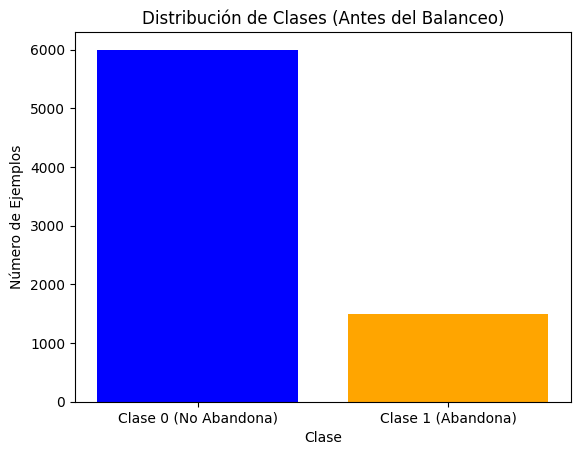

In [16]:
# Crear un gráfico de barras para visualizar el desequilibrio
plt.bar(class_distribution.keys(), class_distribution.values(), color=['blue', 'orange'])
plt.title("Distribución de Clases (Antes del Balanceo)")
plt.xlabel("Clase")
plt.ylabel("Número de Ejemplos")
plt.xticks([0, 1], labels=["Clase 0 (No Abandona)", "Clase 1 (Abandona)"])
plt.show()

In [17]:
#Sobremuestreo manual
#Dedidi usar sobremuestreo
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]  # Filtrar ejemplos de la clase 0
    features_ones = features[target == 1]  # Filtrar ejemplos de la clase 1
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Repetir los ejemplos de la clase minoritaria según el factor `repeat`
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Mezclar aleatoriamente los datos sobremuestreados
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Aplicar sobremuestreo
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


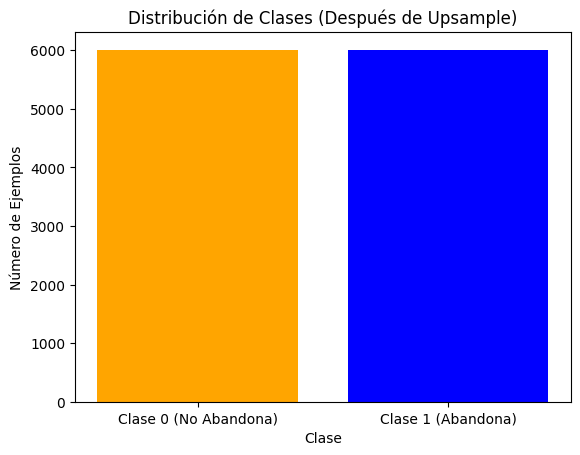

In [18]:
# Visualizar la distribución después de aplicar upsampled
class_distribution_after = Counter(target_upsampled)
plt.bar(class_distribution_after.keys(), class_distribution_after.values(), color=['blue', 'orange'])
plt.title("Distribución de Clases (Después de Upsample)")
plt.xlabel("Clase")
plt.ylabel("Número de Ejemplos")
plt.xticks([0, 1], labels=["Clase 0 (No Abandona)", "Clase 1 (Abandona)"])
plt.show()

# Prueba del modelo

In [19]:
# Inicializamos un modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=5, min_samples_split=10)

# Entrenamos el modelo con los datos balanceados (sobremuestreados)
model.fit(features_upsampled, target_upsampled)

# Paso 7: Validación del modelo
# Predicciones en el conjunto de validación
target_pred = model.predict(features_valid)

# Probabilidades de predicción (si necesitas trabajar con métricas como AUC-ROC)
target_prob = model.predict_proba(features_valid)[:, 1]


In [20]:
# Obtener las probabilidades predichas para la clase 1
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# Analisis resultados

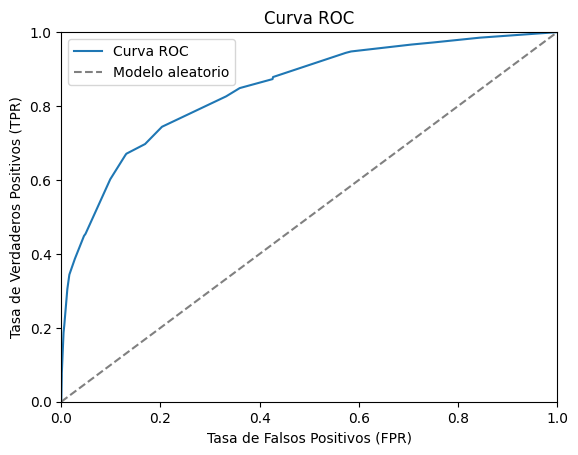

In [21]:
# Calcular las tasas FPR (Tasa de Falsos Positivos) y TPR (Tasa de Verdaderos Positivos)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

# Graficar la Curva ROC
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Modelo aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [22]:
# Evaluar el modelo
print("\nEvaluación del modelo:")
print("F1-Score:", f1_score(target_valid, target_pred))
print("AUC-ROC:", roc_auc_score(target_valid, target_prob))
print("\nReporte de clasificación:\n")
print( classification_report(target_valid, target_pred))


Evaluación del modelo:
F1-Score: 0.6016129032258064
AUC-ROC: 0.8462015172052983

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1965
           1       0.53      0.70      0.60       535

    accuracy                           0.80      2500
   macro avg       0.72      0.76      0.74      2500
weighted avg       0.83      0.80      0.81      2500

